Import Necessary Labs

In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style='white', palette='muted', color_codes=True)
import plotly.express as px
import io 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

Import The File

In [14]:
df = pd.read_csv(r'C:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Find sum of zeroes per column

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

find any duplicates

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

#                                                               MACHINE LEARNING ALGO

Import necessary labs

In [18]:
from sklearn.preprocessing import LabelEncoder  #Changes categorical text data to numerical
from sklearn.preprocessing import OneHotEncoder # Changes cat to numerical only that its better -- check notes for difference
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LinearRegression #
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error #
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestRegressor #
from sklearn.compose import ColumnTransformer
import warnings # suppresses pesky warnings??
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


Encode Categorical Variables - categorical columns are -- sex, Smoker and region

In [20]:
#Label encoder are good for if you have two types of cat values --- either 'Yes' or 'No' aka for all data you get either '0' or '1'
le = LabelEncoder()
#Sex
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
#Smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


Now look at the data below (the data has been transformed without creating new columns)

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Again, if there are numerous categories in a column, is best to use a OneHotEncoder

# Selecting Targets and Features for Prediction
-Target is what we want to Predict. In a regression problem, is a continuous numeric variable. In this example we will use  -- charges
-Features are variable used to predict the target ---age, sex, bmi, children, smoker and region

#                          STEPS OF PREDICTIONS (FEATURE ENGINEERING)
A feature engineering is a process of optimizing model features

1) Find which features have highest correlation with charges 


In [22]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

2) Use a Heatmap to further explore the correlation

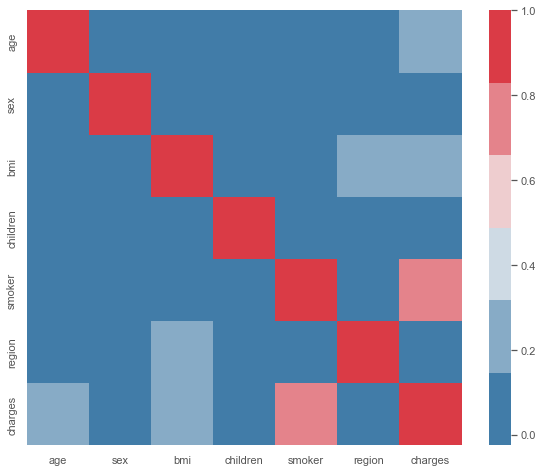

In [23]:
#Rem the dtype is because the LabelEncoder
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10), square=True, ax=ax);

2) Run a distribution Matrix correlating to the changes(determines how much is spend )

<AxesSubplot:xlabel='charges', ylabel='Count'>

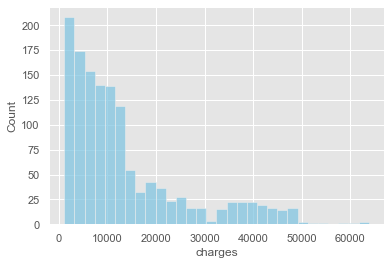

In [24]:
#   a) How many patients pay each amount of money
sns.histplot(df['charges'], color='c')

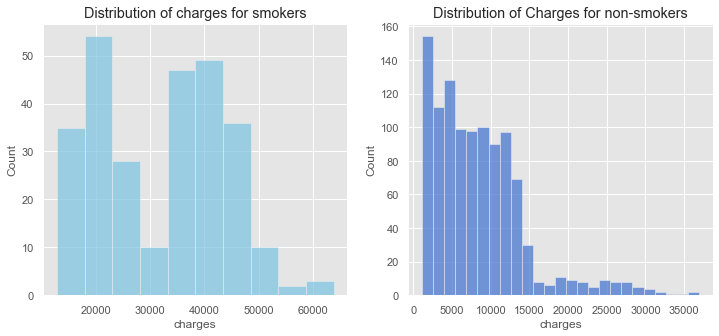

In [26]:
#   b) Break down on cost for smokers and non smokers
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.histplot(df[(df.smoker == 1)]['charges'],color='c', ax=ax)  #plots smokers charges
ax.set_title('Distribution of charges for smokers');

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker == 0)]['charges'], color='b', ax=ax)
ax.set_title('Distribution of Charges for non-smokers');

#          Assign Targets and Features to regression Variables x and Y